# 1. Import libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset

In [4]:
df=fetch_california_housing()

In [5]:
data=pd.DataFrame(df.data,columns=df.feature_names)

In [6]:
data["price"]=df.target


In [27]:
data=data.drop(columns=["age"])

In [28]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# seprate into independent and dependent variables

In [8]:
x=data.drop("price",axis=1)
y=data["price"]

In [9]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


# slecting train and test data

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [11]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [12]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
17505    2.37500
13512    0.67300
10842    2.18400
16559    1.19400
5786     2.09800
Name: price, Length: 6192, dtype: float64

In [13]:
y_train

7061     1.93800
14689    1.69700
17323    2.59800
10056    1.36100
15750    5.00001
          ...   
11284    2.29200
11964    0.97800
5390     2.22100
860      2.83500
15795    3.25000
Name: price, Length: 14448, dtype: float64

# normlising the dataset

In [14]:
scaler=StandardScaler()
x_train_norm=scaler.fit_transform(x_train)

In [15]:
x_test_norm=scaler.transform(x_test)

# train dataset 

In [16]:
regression=LinearRegression()
regression.fit(x_train_norm,y_train)

LinearRegression()

# Model Predictions

In [17]:
regprd=regression.predict(x_test_norm)

# calculate the error

In [18]:
error=y_test-regprd

In [19]:
error

20046   -0.249049
3024    -1.309434
15663    2.289088
20484   -0.649147
9814     0.173042
           ...   
17505    0.155059
13512   -0.237516
10842    0.109345
16559   -0.379714
5786     0.270559
Name: price, Length: 6192, dtype: float64

# matrices of the model

In [29]:

print(mean_absolute_error(y_test,regprd))
print(mean_squared_error(y_test,regprd))
print(r2_score(y_test,regprd))

0.5272474538305953
0.5305677824766754
0.5957702326061662


In [30]:
# adjusted r squre Adjusted R ^ 2 = 1 - (((1 - R ^ 2)(n - 1))/(n - p - 1))

In [31]:
score=r2_score(y_test,regprd)

In [35]:

1 - (1 - score) * (len(y_test) / (len(y_test) - x_test_norm.shape[1] - 1))


0.595181834109232

# graph between actual vs predicted 

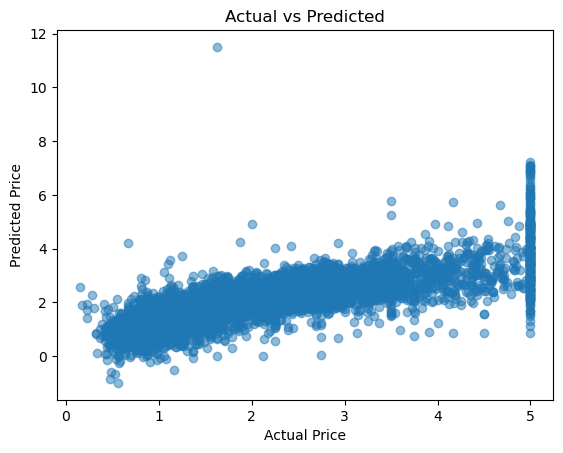

In [36]:
plt.scatter(y_test, regprd, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()


# Save the model

In [37]:
import joblib
joblib.dump(regression, "linear_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

# Use the model for prediction on new data

In [48]:
new_data = [[8, 4, 1, 1, 300, 6, 34, -111]]
new_data_scaled = scaler.transform(new_data)

prediction = regression.predict(new_data_scaled)
print("Predicted price:", prediction)


Predicted price: [1.09423417]


C:\Users\welcome\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [49]:
new2=[[2,3,4,5,6,7,8,9]]
new2_scaled=scaler.transform(new2)
predicat=regression.predict(new2_scaled)
print("prediction price",predicat)

prediction price [-40.00601386]


C:\Users\welcome\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
